# 1. Import `Libraries`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub as kaggle
import os
# uncomment below code if u need plt.show() in your code editor or any environment
# %matplotlib inline

In [2]:
# CONSTANTS
TRAIN_FILE = 'train.csv'
TEST_FILE = 'test.csv'

# 2. Reading Data from CSV Files
The dataset is divided into two parts: train and test.
In this practice, we will focus solely on the `train.csv` file.

see dataset: [Kaggle -> Mobile-Price-Classification][1]

[1]: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification "dataset link in kaggle"

In [3]:
df = pd.read_csv(TRAIN_FILE)
# df_test = pd.read_csv(TEST_FILE)

# 3. Exploratory Data Analysis (EDA) with `Pandas`
In this section, we will perform a brief exploratory data analysis (EDA) on the dataset using the Pandas library.

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [6]:
print(f'Columns (features): {len(df.columns)}')
print(f'Rows: {df.shape[0]}')

Columns (features): 21
Rows: 2000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
# check if dataset has null value
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [10]:
# check if dataset has nan value (like string & etc.)
non_numeric_columns = df.select_dtypes(exclude='number').columns
print(f'non numeric columns count: {len(non_numeric_columns)}')

non numeric columns count: 0


# 4. Analyzing Data: Distribution, Correlation, and Feature Relationships with Price
In this section, we will analyze the dataset to understand:
1. The distribution of numerical features.
2. The correlation between features.
3. The relationship between each feature and the target variable `mobile price`.

We will use visualizations and statistical methods to gain insights into the data.

## 1.4. check distribution of features

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'fc'}>],
       [<Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >]], 

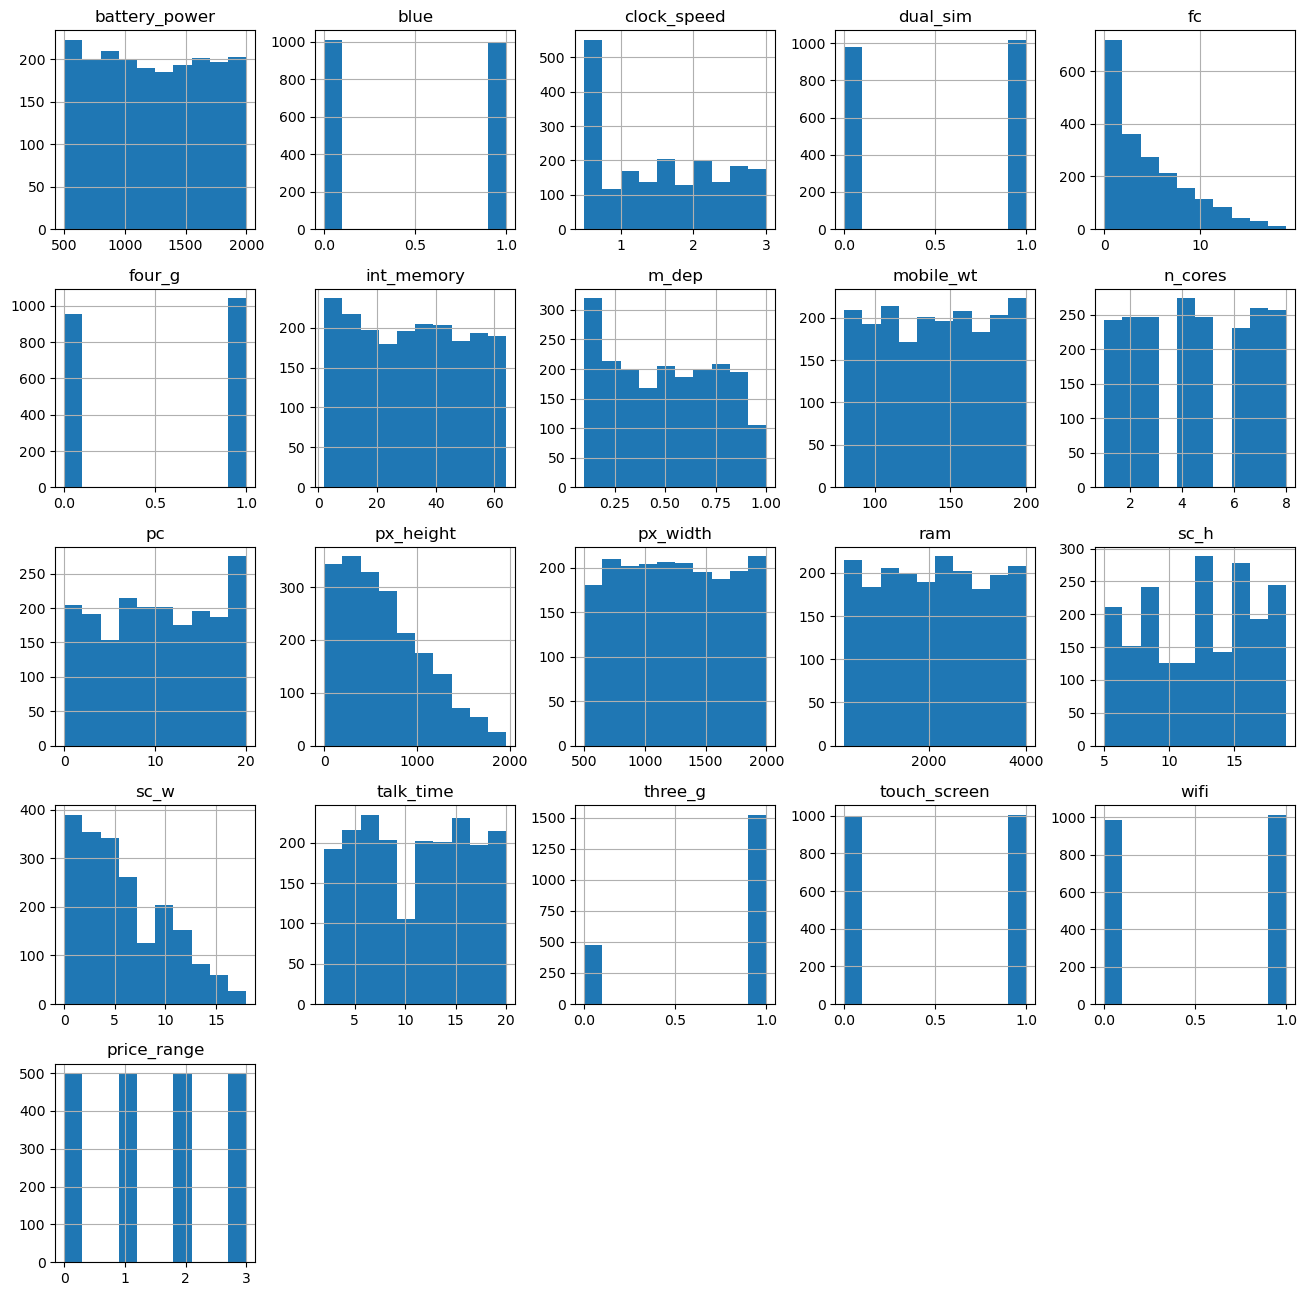

In [14]:
df.hist(figsize=(16,16))

In [ ]:
# As you can see, the front camera megapixels (fc) have some outliers.
df['fc'].describe()

count    2000.000000
mean        4.309500
std         4.341444
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        19.000000
Name: fc, dtype: float64

In [ ]:
# Also pixel height have some outliers.
df['px_height'].describe()

count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

In [ ]:
# Screen Width of mobile in cm
df['sc_w'].describe()

count    2000.000000
mean        5.767000
std         4.356398
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

<Axes: ylabel='count'>

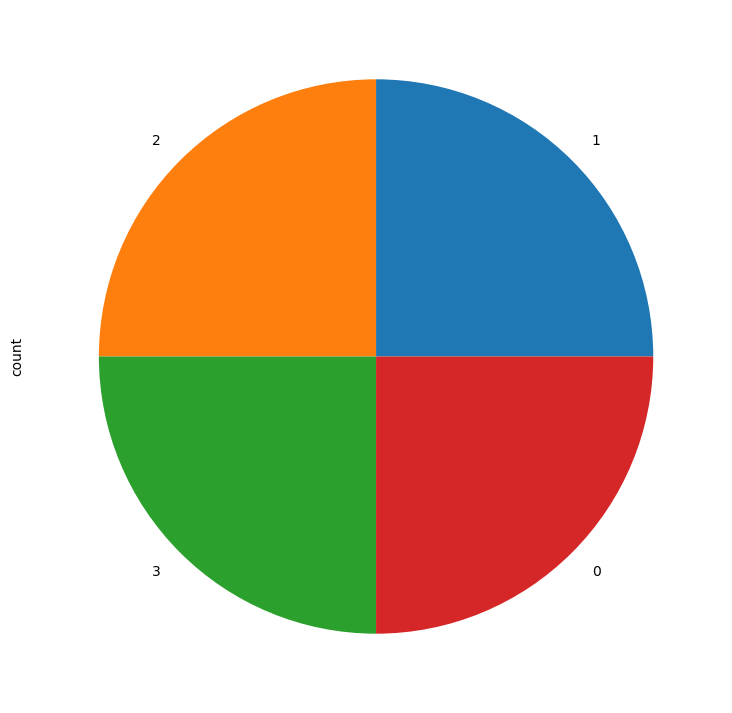

In [ ]:
# Data is well distributed
df['price_range'].value_counts().plot(kind='pie', figsize=(14,9))

## 2.4. The correlation between features

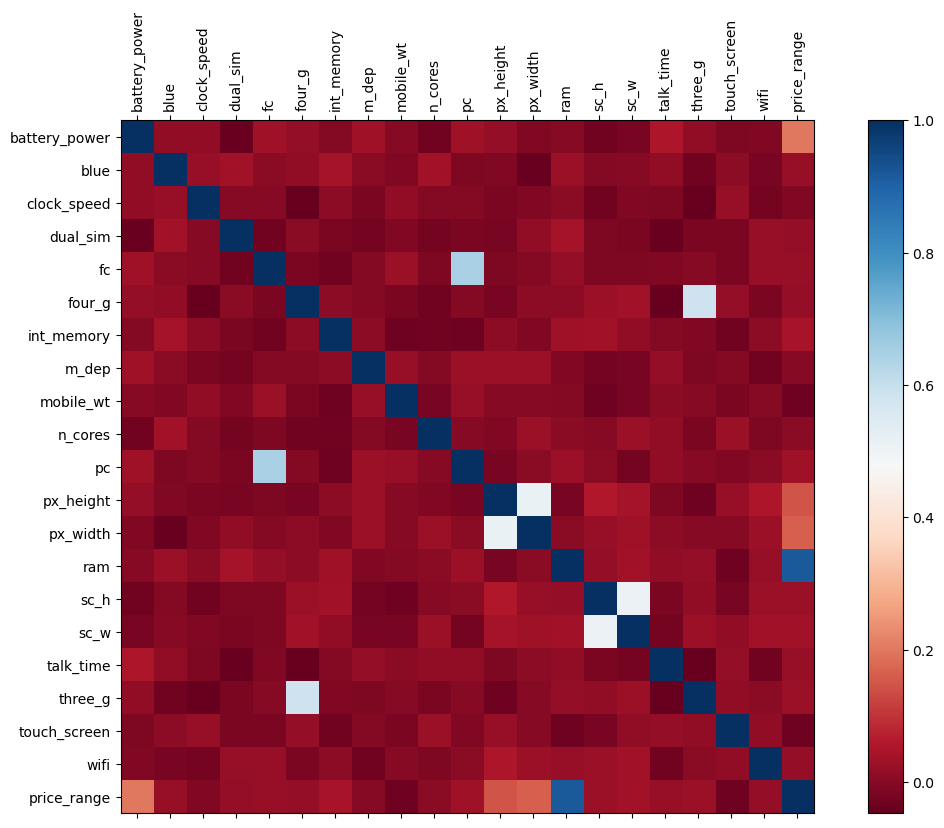

In [51]:
corr = df.corr()

fig, ax = plt.subplots(figsize = (14,9))
cax = ax.matshow(corr, cmap = 'RdBu')
fig.colorbar(cax)

ax.set_xticks(range(len(corr)), corr.columns, rotation = 'vertical')
ax.set_yticks(range(len(corr)), corr.columns)

In [70]:
high_corr = corr.where((corr > 0.6) * (corr < 1))
high_corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clock_speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dual_sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
four_g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_memory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m_dep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mobile_wt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_cores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
# Convert the correlation matrix into a Series with MultiIndex 
# by stacking column labels into row indices. 
# This flattens the matrix and removes NaN values by default.
stacked_corr = high_corr.stack()
stacked_corr.index.set_names(['Row','Column'], inplace=True)
stacked_corr.name = 'Correlation'
print(stacked_corr)

Row          Column     
fc           pc             0.644595
pc           fc             0.644595
ram          price_range    0.917046
price_range  ram            0.917046
Name: Correlation, dtype: float64


In [94]:
# convert Series to DataFrame
df_corr = stacked_corr.reset_index()
df_corr

,Row,Column,Correlation
0,fc,pc,0.644595
1,pc,fc,0.644595
2,ram,price_range,0.917046
3,price_range,ram,0.917046


## 3.4. The relationship between each feature and the target variable `mobile price`.

<Axes: xlabel='ram', ylabel='price_range'>

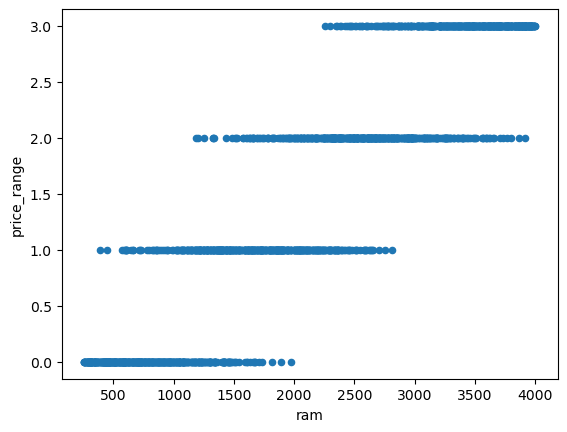

In [102]:
df.plot(kind= 'scatter', x = 'ram', y = 'price_range')

<Axes: title={'center': 'price_range'}, xlabel='pc'>

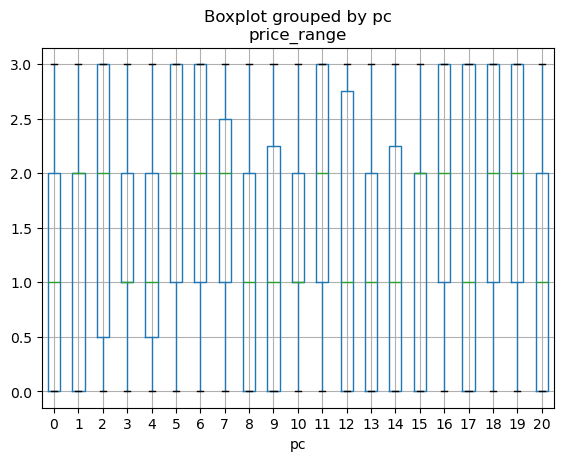

In [ ]:
df.boxplot(column = 'price_range', by ='pc')